In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [7]:
# Codingan dibawah ini berfungsi untuk import library / ngambil kodingan dari orang lain

import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
%matplotlib inline
from matplotlib.pylab import rcParams #Untuk visualisasi
from datetime import datetime #Untuk mengatasi tipe data tanggal


In [8]:
# Import data

df = pd.read_csv('../input/air-passengers/AirPassengers.csv')

In [9]:
# Menampilkan data yang sudah diimport

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
# Cek tipe data dan missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [11]:
# Cek duplikat

df['Month'].duplicated().any()

False

In [13]:
# Mengubah tipe data di kolom Month dari object menjadi datetime

df['Month'] = pd.to_datetime(df['Month'], format="%Y-%m")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [15]:
df['Month'].duplicated().any()

False

In [16]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
# Kolom yang berisi tanggal kita jadikan sebagai index

df=df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


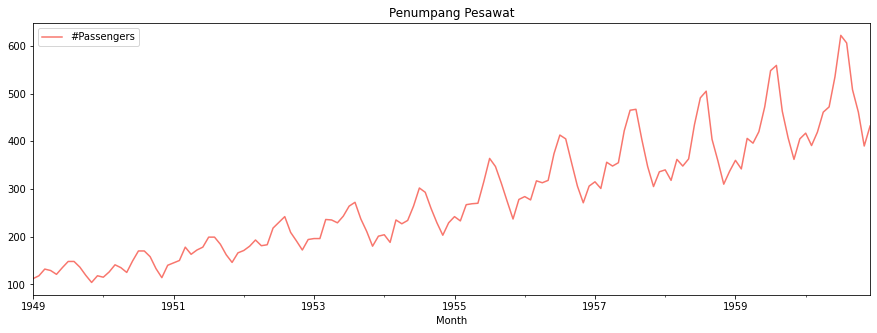

In [18]:
# Visualisasi data time-seriesnya

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='-', figsize=(15,5), color=color_pal[0], title="Penumpang Pesawat")
plt.show()

In [34]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.2

test_set_size = int(len(df) * test_ratio)
df_train = df[0:-test_set_size].copy()
df_test = df[-test_set_size:].copy()

In [35]:
test_set_size

28

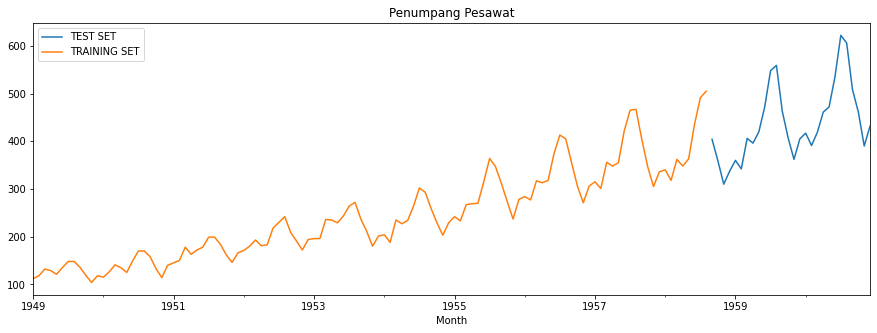

In [36]:
# Melihat hasil pembagian data kita menggunakan visualisasi
df_test \
    .rename(columns={'#Passengers': 'TEST SET'}) \
    .join(df_train.rename(columns={'#Passengers': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Penumpang Pesawat", style='-')
plt.show()

In [37]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)

from prophet import Prophet

In [38]:
# Mengembalikan kolom Month ke bentuk semula (sebelum jadi index)
df_train.reset_index(inplace = True)


In [39]:
# Mengubah nama kolom sesuai dengan anturan dari FBProphet
df_train.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace = True)


In [40]:
# Preprocessing untuk menggunakan Prophet model ini untuk df_test

df_test.reset_index(inplace = True)
df_test.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace = True)
    
df_test


,ds,y
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


In [41]:
# Kita panggil model FbProphetnya

model = Prophet()

In [42]:
# Kita ingin melatih model machine learning kita
model.fit(df_train)

13:44:52 - cmdstanpy - INFO - Chain [1] start processing
13:44:52 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Memprediksikan menggunakan model machine learning

hasil_prediksi = model.predict(df_test)

In [44]:
hasil_prediksi

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-09-01,407.830912,400.206278,445.085209,407.830799,407.830912,13.733482,13.733482,13.733482,13.733482,13.733482,13.733482,0.0,0.0,0.0,421.564394
1,1958-10-01,410.973425,368.852882,414.217764,410.950808,410.988824,-19.957543,-19.957543,-19.957543,-19.957543,-19.957543,-19.957543,0.0,0.0,0.0,391.015882
2,1958-11-01,414.220689,341.376590,392.005164,414.153716,414.278582,-49.242518,-49.242518,-49.242518,-49.242518,-49.242518,-49.242518,0.0,0.0,0.0,364.978172
3,1958-12-01,417.363203,368.360975,415.143857,417.237040,417.466231,-25.356628,-25.356628,-25.356628,-25.356628,-25.356628,-25.356628,0.0,0.0,0.0,392.006575
4,1959-01-01,420.610467,376.272800,423.639521,420.439415,420.773665,-21.547834,-21.547834,-21.547834,-21.547834,-21.547834,-21.547834,0.0,0.0,0.0,399.062633
5,1959-02-01,423.857731,374.279140,420.796064,423.609606,424.088261,-26.604196,-26.604196,-26.604196,-26.604196,-26.604196,-26.604196,0.0,0.0,0.0,397.253535
6,1959-03-01,426.790744,406.696683,452.170399,426.480646,427.075305,1.716052,1.716052,1.716052,1.716052,1.716052,1.716052,0.0,0.0,0.0,428.506796
7,1959-04-01,430.038008,399.768813,445.101999,429.644899,430.412693,-6.877089,-6.877089,-6.877089,-6.877089,-6.877089,-6.877089,0.0,0.0,0.0,423.160919
8,1959-05-01,433.180521,405.352172,451.999832,432.724651,433.638963,-4.673195,-4.673195,-4.673195,-4.673195,-4.673195,-4.673195,0.0,0.0,0.0,428.507326
9,1959-06-01,436.427785,440.038993,485.333612,435.878380,436.983853,25.797064,25.797064,25.797064,25.797064,25.797064,25.797064,0.0,0.0,0.0,462.224849


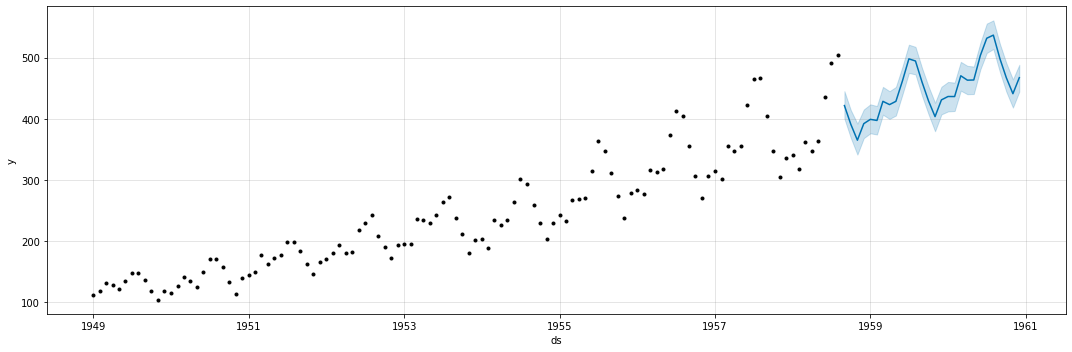

In [45]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(hasil_prediksi,
                 ax=ax)
plt.show()

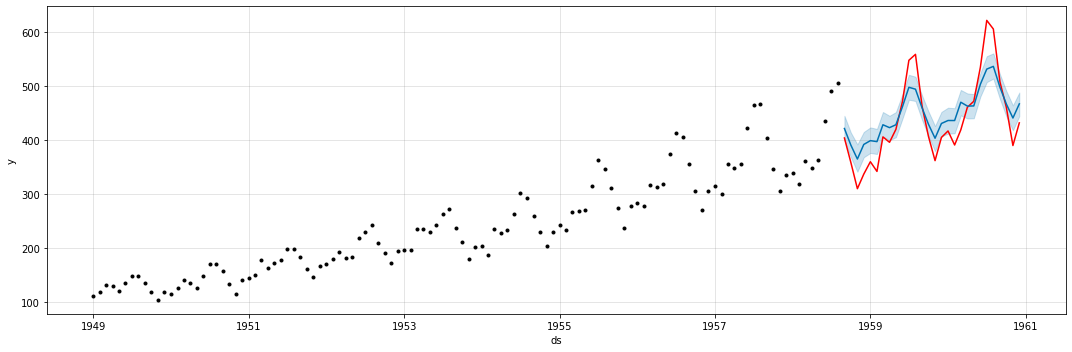

In [46]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi, ax=ax)

In [47]:
# Kita perlu ngebuat dataframe baru

prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])

In [50]:
# Masukkan tanggal yang ingin kita prediksi

prediksi_tahun_berikutnya['ds'] = pd.date_range(start='1961-01-01', periods=12, freq='MS')

In [51]:
prediksi_tahun_berikutnya

,ds,y
0,1961-01-01,NaN
1,1961-02-01,NaN
2,1961-03-01,NaN
3,1961-04-01,NaN
4,1961-05-01,NaN
5,1961-06-01,NaN
6,1961-07-01,NaN
7,1961-08-01,NaN
8,1961-09-01,NaN
9,1961-10-01,NaN


In [52]:
hasil_prediksi_satu_tahun_kedepan = model.predict(prediksi_tahun_berikutnya)

In [54]:
hasil_prediksi_satu_tahun_kedepan

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,497.183047,455.349309,500.875282,493.995140,500.385821,-19.767978,-19.767978,-19.767978,-19.767978,-19.767978,-19.767978,0.0,0.0,0.0,477.415069
1,1961-02-01,500.430311,447.991190,494.452130,497.029291,503.856555,-28.334163,-28.334163,-28.334163,-28.334163,-28.334163,-28.334163,0.0,0.0,0.0,472.096148
2,1961-03-01,503.363324,482.889294,529.469583,499.740762,506.951895,4.019131,4.019131,4.019131,4.019131,4.019131,4.019131,0.0,0.0,0.0,507.382455
3,1961-04-01,506.610588,478.669864,523.634876,502.816780,510.406719,-5.825930,-5.825930,-5.825930,-5.825930,-5.825930,-5.825930,0.0,0.0,0.0,500.784658
4,1961-05-01,509.753101,478.584764,524.993181,505.865008,513.716111,-6.965349,-6.965349,-6.965349,-6.965349,-6.965349,-6.965349,0.0,0.0,0.0,502.787752
5,1961-06-01,513.000365,518.076949,564.196211,508.958691,517.120525,27.794099,27.794099,27.794099,27.794099,27.794099,27.794099,0.0,0.0,0.0,540.794465
6,1961-07-01,516.142879,547.747030,594.515297,511.916313,520.347580,55.320302,55.320302,55.320302,55.320302,55.320302,55.320302,0.0,0.0,0.0,571.463181
7,1961-08-01,519.390143,549.887663,597.713897,514.966572,523.771931,54.295807,54.295807,54.295807,54.295807,54.295807,54.295807,0.0,0.0,0.0,573.685950
8,1961-09-01,522.637407,512.494951,560.275747,518.017845,527.212231,13.724557,13.724557,13.724557,13.724557,13.724557,13.724557,0.0,0.0,0.0,536.361964
9,1961-10-01,525.779921,482.736104,528.334098,520.922657,530.621251,-20.226560,-20.226560,-20.226560,-20.226560,-20.226560,-20.226560,0.0,0.0,0.0,505.553360


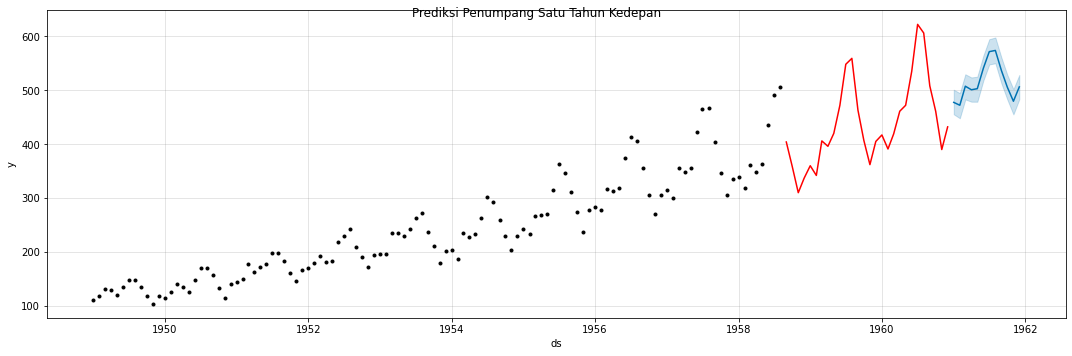

In [55]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi_satu_tahun_kedepan,
                 ax=ax)
fig = plt.suptitle("Prediksi Penumpang Satu Tahun Kedepan")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [57]:
hasil_prediksi['yhat'] = hasil_prediksi['yhat'].astype(int)

In [58]:
df_test['y']

0     404
1     359
2     310
3     337
4     360
5     342
6     406
7     396
8     420
9     472
10    548
11    559
12    463
13    407
14    362
15    405
16    417
17    391
18    419
19    461
20    472
21    535
22    622
23    606
24    508
25    461
26    390
27    432
Name: y, dtype: int64

In [59]:
hasil_prediksi['yhat']

0     421
1     391
2     364
3     392
4     399
5     397
6     428
7     423
8     428
9     462
10    497
11    494
12    459
13    429
14    403
15    430
16    436
17    436
18    470
19    463
20    463
21    503
22    531
23    536
24    498
25    467
26    440
27    467
Name: yhat, dtype: int64

In [60]:
mean_squared_error(df_test['y'], hasil_prediksi['yhat'])

1640.9642857142858

In [62]:
mean_absolute_error(df_test['y'], hasil_prediksi['yhat'])

33.82142857142857